In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn
import torch.nn.functional as F

**Initializing tensors** and getting their values out

In [3]:
scalar = torch.tensor(7).to(device='cuda')

In [4]:
scalar.shape

torch.Size([])

the ***item()*** works only on scalars. Returns the value of this tensor as a standard Python number. This only works for tensors with one element.



In [5]:
scalar.item(), scalar.type(), scalar.device

(7, 'torch.cuda.LongTensor', device(type='cuda', index=0))

In [6]:
float(scalar), scalar.cpu().numpy()

(7.0, array(7))

In [7]:
vector = torch.tensor([3.,7.], device='cuda')

**.tolist()** Returns the tensor as a (nested) list. For scalars, a standard Python number is returned, just like with item(). Tensors are automatically moved to the CPU first if necessary.

In [8]:
vector, vector.type()

(tensor([3., 7.], device='cuda:0'), 'torch.cuda.FloatTensor')

In [9]:
vector.cpu().numpy(), vector.tolist()

(array([3., 7.], dtype=float32), [3.0, 7.0])

In [10]:
vector.shape

torch.Size([2])

In [11]:
matrix = torch.tensor([[3,4,5],[6,7,8]], device='cuda')

In [12]:
matrix

tensor([[3, 4, 5],
        [6, 7, 8]], device='cuda:0')

In [13]:
matrix.shape, matrix.ndim, matrix.dtype

(torch.Size([2, 3]), 2, torch.int64)

In [14]:
matrix.tolist()

[[3, 4, 5], [6, 7, 8]]

In [15]:
tensor = torch.randn(size=(3,4))

In [16]:
tensor

tensor([[ 0.2850,  1.4392,  1.5652,  0.5025],
        [-0.5373, -0.4661,  1.5290,  1.2980],
        [ 0.8045,  0.7029, -0.9047,  0.4238]])

In [17]:
tensor.device, tensor.dtype

(device(type='cpu'), torch.float32)

In [18]:
tensor.tolist()

[[0.2850387990474701,
  1.4391846656799316,
  1.5652246475219727,
  0.5024697184562683],
 [-0.5372500419616699,
  -0.4661068320274353,
  1.5289808511734009,
  1.2979997396469116],
 [0.8045080900192261,
  0.70290607213974,
  -0.9046683311462402,
  0.42376425862312317]]

In [19]:
tensor.cpu().numpy()

array([[ 0.2850388 ,  1.4391847 ,  1.5652246 ,  0.5024697 ],
       [-0.53725004, -0.46610683,  1.5289809 ,  1.2979997 ],
       [ 0.8045081 ,  0.7029061 , -0.90466833,  0.42376426]],
      dtype=float32)

**Zeroes** and **Ones**

In [20]:
zeros = torch.zeros(size=(3,4))

In [21]:
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [22]:
zeros.dtype

torch.float32

In [23]:
ones = torch.ones(size=(3,4))

In [24]:
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [25]:
torch.ones_like(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

## Creating tensor from a range




In [26]:
zero2ten = torch.arange(1, 10, .5)

In [27]:
zero2ten.dtype

torch.float32

In [28]:
zero2ten

tensor([1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000,
        5.5000, 6.0000, 6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000, 9.5000])

# Torch Data Types
- All supported datatypes can be found here: https://pytorch.org/docs/stable/tensors.html#data-types
- By default all decimal take the datatype **torch.float32**
- If it is an integer tensor the datatype **torch.int64**
- Reducing the precision (i.e converting torch.float32 -> torch.float16)
 - saves memory
 - reduces compute time
 - however, performance takes a hit

In [29]:
tensor16 = torch.rand(size=(3,4)).type(torch.float16)

In [30]:
tensor16

tensor([[0.9775, 0.9541, 0.1236, 0.0898],
        [0.0547, 0.4666, 0.0670, 0.9258],
        [0.7988, 0.4463, 0.9712, 0.5107]], dtype=torch.float16)

# Important tensor class attributes
- `shape` - what shape is the tensor? (some operations require specific shape

rules)
- `dtype` - what datatype are the elements within the tensor stored in?
- `device` - what device is the tensor stored on? (usually GPU or CPU)

In [31]:
r = torch.rand(size=(3,4))
print ('Information about tensor')
print (f'shape = {r.shape}')
print (f'dtype = {r.dtype}')
print (f'device = {r.device}')

Information about tensor
shape = torch.Size([3, 4])
dtype = torch.float32
device = cpu


# Tensor multiplication

In [32]:
t1 = torch.arange(0, 10, 1).reshape(2,5)
t1

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [33]:
t2 = torch.arange(10, 20, 1).reshape(2,5)
t2

tensor([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

In [34]:
# Normal elementwise multiplication
t1*t1

tensor([[ 0,  1,  4,  9, 16],
        [25, 36, 49, 64, 81]])

In [36]:
# Matrix multiplication
t1 @ t2

RuntimeError: ignored

In [37]:
t3 = t1.T @ t2

In [38]:
t3

tensor([[ 75,  80,  85,  90,  95],
        [100, 107, 114, 121, 128],
        [125, 134, 143, 152, 161],
        [150, 161, 172, 183, 194],
        [175, 188, 201, 214, 227]])

In [39]:
# get all the items in the 3rd column
t3[:, 2].numpy()

array([ 85, 114, 143, 172, 201])

In [40]:
# check the time for a looped matrix multiplication
%%timeit
l = []
a = t1.T
b = t2
r1, c1 = a.shape
r2, c2 = b.shape
for i in range(r1):
    l.append([torch.dot(a[i], b[:, j]) for j in range(c2)])
t4 = torch.tensor(l)

389 µs ± 50.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Torch Linear Layer

In [41]:
%%timeit
torch.manual_seed(42)
linear = nn.Linear(in_features=3, out_features=4)
x = torch.rand(size=(1, 3))
output = linear(x)

132 µs ± 21.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Mean and Sum

In [42]:
m = torch.arange(1, 10 , 1).type(torch.float32)

In [43]:
m, m.squeeze(), m.unsqueeze(0), m.unsqueeze(1)

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]))

In [44]:
m.sum(), m.min(), m.max(), m.mean()

(tensor(45.), tensor(1.), tensor(9.), tensor(5.))

In [45]:
print(f'argmin={m.argmin()}, argmax={m.argmax()}')

argmin=0, argmax=8


In [46]:
imax = m.argmax()
imax.item()

8

In [47]:
imax.is_cuda()

TypeError: ignored

## Reshaping

In [48]:
# Create a tensor
import torch
x = torch.arange(0., 8.)
x, x.shape

(tensor([0., 1., 2., 3., 4., 5., 6., 7.]), torch.Size([8]))

In [49]:
y = x.reshape(4,2)
y

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.]])

In [50]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1,8)
z

tensor([[0., 1., 2., 3., 4., 5., 6., 7.]])

In [51]:
z[:,3] = 15
x

tensor([ 0.,  1.,  2., 15.,  4.,  5.,  6.,  7.])

In [68]:
z

tensor([[ 0.,  1.,  2., 15.,  4.,  5.,  6.,  7.]])

## torch.stack Concatenates sequence of tensors along a **new dimension**. There is a new dimension added


In [66]:
st = torch.stack([z, z, z], dim=0)
st, z.shape, st.shape

(tensor([[[ 0.,  1.,  2., 15.,  4.,  5.,  6.,  7.]],
 
         [[ 0.,  1.,  2., 15.,  4.,  5.,  6.,  7.]],
 
         [[ 0.,  1.,  2., 15.,  4.,  5.,  6.,  7.]]]),
 torch.Size([1, 8]),
 torch.Size([3, 1, 8]))

In [69]:
st = torch.stack([z, z, z], dim=1)
st, z.shape, st.shape

(tensor([[[ 0.,  1.,  2., 15.,  4.,  5.,  6.,  7.],
          [ 0.,  1.,  2., 15.,  4.,  5.,  6.,  7.],
          [ 0.,  1.,  2., 15.,  4.,  5.,  6.,  7.]]]),
 torch.Size([1, 8]),
 torch.Size([1, 3, 8]))

In [70]:
st = torch.stack([z, z, z], dim=2)
st, z.shape, st.shape

(tensor([[[ 0.,  0.,  0.],
          [ 1.,  1.,  1.],
          [ 2.,  2.,  2.],
          [15., 15., 15.],
          [ 4.,  4.,  4.],
          [ 5.,  5.,  5.],
          [ 6.,  6.,  6.],
          [ 7.,  7.,  7.]]]),
 torch.Size([1, 8]),
 torch.Size([1, 8, 3]))

In [61]:
torch.concat([z, z, z], dim=1)

tensor([[ 0.,  1.,  2., 15.,  4.,  5.,  6.,  7.,  0.,  1.,  2., 15.,  4.,  5.,
          6.,  7.,  0.,  1.,  2., 15.,  4.,  5.,  6.,  7.]])

In [13]:
uns_x = torch.arange(0,8).unsqueeze(dim=0)
uns_x, uns_x.shape

(tensor([[0, 1, 2, 3, 4, 5, 6, 7]]), torch.Size([1, 8]))

In [14]:
sq_x = uns_x.squeeze()
sq_x, sq_x.shape

(tensor([0, 1, 2, 3, 4, 5, 6, 7]), torch.Size([8]))

## A new dimension can also be added using the **None Trick**

In [17]:
sq_x.shape, sq_x[:, None].shape

(torch.Size([8]), torch.Size([8, 1]))

In [95]:
r = list(uns_x.shape)
r

[1, 8]

In [26]:
%%latex
f(x_1, x_2) = \frac{1+\sin(x_2)}{x_2+e^{x_1}} + x_1x_2

<IPython.core.display.Latex object>

In [32]:
x1, x2 = torch.tensor(1.5, requires_grad=True), torch.tensor(0.5, requires_grad=True)
f = ((1 + torch.sin(x2))/(x2+torch.exp(x1))) + x1*x2
f.backward()
x1.grad, x2.grad

(tensor(0.2328), tensor(1.6165))

## A Native implementation of a Tensor and Computation graph
#### Source:-> https://programming-review.com/pytorch/ad

In [43]:
import math
class ADNumber:

    def __init__(self,val, name=""):
        self.name=name
        self._val=val
        self._children=[]

    def __truediv__(self,other):
        new = ADNumber(self._val / other._val, name=f"{self.name}/{other.name}")
        self._children.append((1.0/other._val,new))
        other._children.append((-self._val/other._val**2,new)) # first derivation of 1/x is -1/x^2
        return new

    def __mul__(self,other):
        new = ADNumber(self._val*other._val, name=f"{self.name}*{other.name}")
        self._children.append((other._val,new))
        other._children.append((self._val,new))
        return new

    def __add__(self,other):
        if isinstance(other, (int, float)):
            other = ADNumber(other, str(other))
        new = ADNumber(self._val+other._val, name=f"{self.name}+{other.name}")
        self._children.append((1.0,new))
        other._children.append((1.0,new))
        return new

    def __sub__(self,other):
        new = ADNumber(self._val-other._val, name=f"{self.name}-{other.name}")
        self._children.append((1.0,new))
        other._children.append((-1.0,new))
        return new


    @staticmethod
    def exp(self):
        new = ADNumber(math.exp(self._val), name=f"exp({self.name})")
        self._children.append((math.exp(self._val),new))
        return new

    @staticmethod
    def sin(self):
        new = ADNumber(math.sin(self._val), name=f"sin({self.name})")
        self._children.append((math.cos(self._val),new)) # first derivation is cos
        return new

    def grad(self,other):
        if self==other:
            print (f'{self.name}=={other.name}')
            return 1.0
        else:
            result=0.0
            for child in other._children:
                result+=child[0]*self.grad(child[1])
            return result

A = ADNumber # shortcuts
sin = A.sin
exp = A.exp

def print_child(f, wrt): # with respect to
    for e in f._children:
        print("child:", wrt, "->" , e[1].name, "grad: ", e[0])
        print_child(e[1], e[1].name)


x1 = A(1.5, name="x1")
x2 = A(0.5, name="x2")
f=(sin(x2)+1)/(x2+exp(x1))+x1*x2
print_child(x1,"x1")
print("\ncalculated gradient for the function f with respect to x1:", f.grad(x1))

child: x1 -> exp(x1) grad:  4.4816890703380645
child: exp(x1) -> x2+exp(x1) grad:  1.0
child: x2+exp(x1) -> sin(x2)+1/x2+exp(x1) grad:  -0.05961284871202578
child: sin(x2)+1/x2+exp(x1) -> sin(x2)+1/x2+exp(x1)+x1*x2 grad:  1.0
child: x1 -> x1*x2 grad:  0.5
child: x1*x2 -> sin(x2)+1/x2+exp(x1)+x1*x2 grad:  1.0
sin(x2)+1/x2+exp(x1)+x1*x2==sin(x2)+1/x2+exp(x1)+x1*x2
sin(x2)+1/x2+exp(x1)+x1*x2==sin(x2)+1/x2+exp(x1)+x1*x2

calculated gradient for the function f with respect to x1: 0.23283374747559749


## The default datatype for **numpy floating point** array is **float64**
## The default datatype for **pytorch floating point** tensor is **float32**

In [1]:
import numpy as np
import torch
print (f'CUDA:-> {torch.cuda.is_available()}')
print (f'TOTAL GPUS:-> {torch.cuda.device_count()}')
np_a = np.arange(1, 10)
print(np_a.dtype)
py_t = torch.from_numpy(np_a)
py_t, py_t.dtype

CUDA:-> False
TOTAL GPUS:-> 0
int64


(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.int64)

In [6]:
# Create tensors
x1 = torch.tensor(1.5, requires_grad=True)
x2 = torch.tensor(0.5, requires_grad=True)
c = torch.tensor(1., requires_grad=True)

# Build a computational graph
y=(torch.sin(x2)+1)/(x2+torch.exp(x1))+x1*x2
#y.backward() # compute gradients

#print(x1.grad)
#print(x2.grad)

In [10]:
x1.item()

1.5

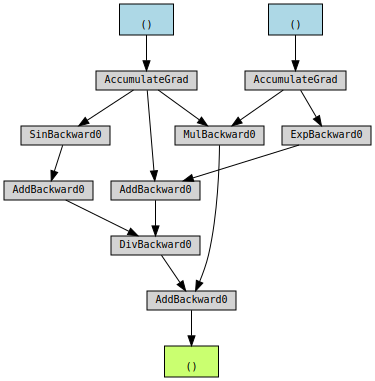

In [8]:
#!pip install torchviz
from torchviz import make_dot
make_dot(y)

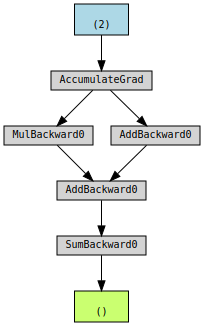

In [15]:
from torchviz import make_dot
x=torch.ones(2, requires_grad=True)
y=2*x
z=3+x
r=(y+z).sum()
r.backward()
make_dot(r)

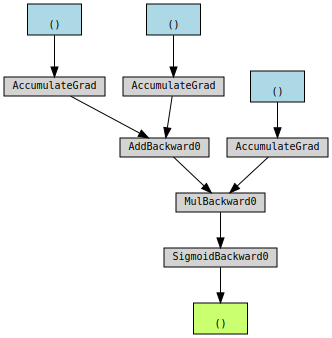

In [25]:
import torch.nn.functional as F
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = a + b
d = torch.tensor(4.0, requires_grad=True)
e = c * d
f = F.sigmoid(e)
f.backward()
make_dot(f)

In [23]:
print(e), e.grad_fn.next_functions

tensor(20., grad_fn=<MulBackward0>)


(None,
 ((<AddBackward0 at 0x79721b7713c0>, 0),
  (<AccumulateGrad at 0x79721b770850>, 0)))

## Building a **linear regression** model

In [96]:
weight = 0.7
bias = 0.3
start, end = 0, 1
step = 0.02

In [97]:
import torch
X = torch.arange(start, end, step)

In [98]:
X = X.unsqueeze(1)
X.shape

torch.Size([50, 1])

In [99]:
y = X * weight + bias
#y = y + 0.01**0.5*torch.randn(y.shape)

In [100]:
X.shape

torch.Size([50, 1])

In [101]:
train_split = int(0.8 * len(X))

In [102]:
train_split

40

In [103]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

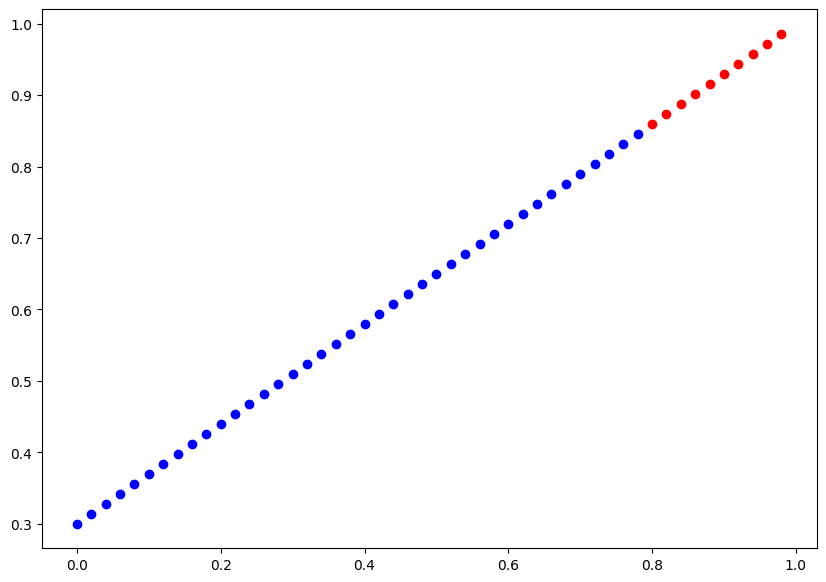

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='r')

In [105]:
torch.manual_seed(42)

In [106]:
import torch
import torch.nn as nn
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x:torch.Tensor):
        return self.weights*x + self.bias

In [107]:
model_0 = LinearRegression()

In [108]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [109]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [110]:
f'real parameters of the distribution = {weight}, {bias}'

'real parameters of the distribution = 0.7, 0.3'

In [111]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]])

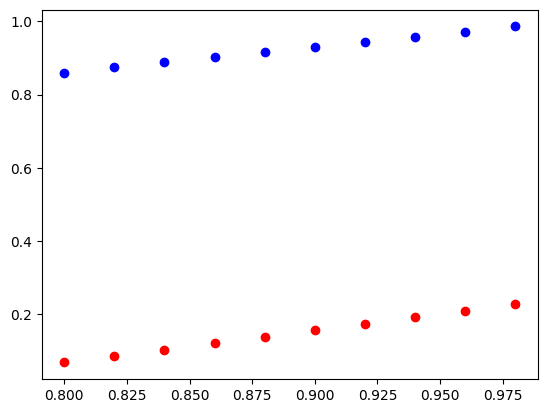

In [112]:
plt.scatter(X_test, y_test, c='b')
plt.scatter(X_test, y_preds, c='r')
plt.show()

In [113]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(model_0.parameters(), lr=1e-2)

In [114]:
with torch.inference_mode():
    list(model_0.parameters())

In [115]:
epochs = 1000
loss_values = []
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()
print (model_0.state_dict())


OrderedDict([('weights', tensor([0.7083])), ('bias', tensor([0.3038]))])


In [118]:
len(loss_values)

1000

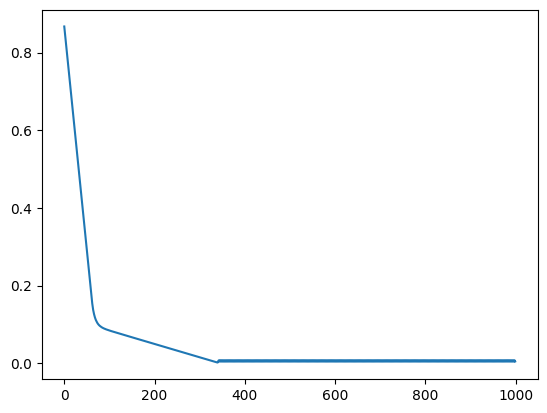

In [116]:
plt.plot(range(epochs), loss_values)

In [119]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8705],
        [0.8846],
        [0.8988],
        [0.9130],
        [0.9271],
        [0.9413],
        [0.9555],
        [0.9696],
        [0.9838],
        [0.9980]])

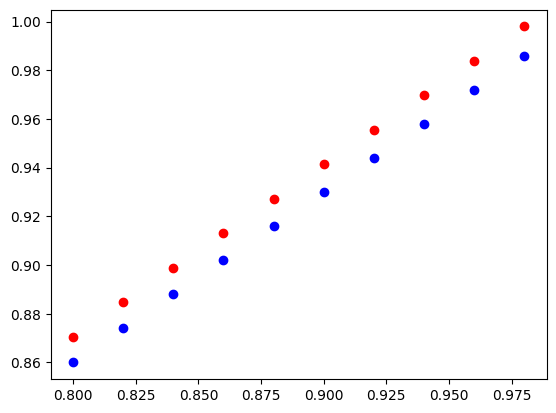

In [120]:
plt.scatter(X_test, y_test, c='b')
plt.scatter(X_test, y_preds, c='r')
plt.show()